<p><b>Introduction</p></b>

<p> <strong>Importing Libraries </strong></p>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\SDI\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<p><b>Data Preparation and cleaning</b></p>
<p> <strong>Load the Dataset
    </strong></p>

In [3]:
Heart = pd.read_csv("heart_2020_cleaned (1).csv") 
Heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<p><strong>Exploratory Data Analysis (EDA)
  <p>  Exploratory Data Analysis (EDA) is the process of analyzing and summarizing a dataset to better understand its main characteristics, discover patterns, anomalies, and relationships between variables. EDA is a crucial step before building a machine learning model, as it helps in understanding the data, identifying potential issues, and deciding on further preprocessing steps.
    </p>
    </strong></p>
<p><b>Data Overview</b></p>

In [4]:
Heart.shape

(319795, 18)

In [5]:
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
Heart["AgeCategory"].replace({'18-24': 0, '25-29': 1,'30-34': 2, '35-39': 3,'40-44': 4, '45-49': 5,'50-54': 6, '55-59': 7,'60-64': 8, '65-69': 9,'70-74': 10, '75-79': 11,'80 or older': 12}, inplace=True)
Heart["KidneyDisease"].replace({'No': 0, 'Yes': 1}, inplace=True)
Heart["Asthma"].replace({'No': 0, 'Yes': 1}, inplace=True)
Heart["SkinCancer"].replace({'No': 0, 'Yes': 1}, inplace=True)
Heart["GenHealth"].replace({'Poor': 0, 'Fair': 1,'Good': 2, 'Very good': 3, 'Excellent': 4}, inplace=True)
Heart["PhysicalActivity"].replace({'No': 0, 'Yes': 1}, inplace=True)
Heart["Diabetic"].replace({'Yes': 1, 'No': 0, 'No, borderline diabetes': 2}, inplace=True)
Heart["Race"].replace({'White': 0, 'Black': 1,'Hispanic': 2, 'Asian': 3,'American Indian/Alaskan Native': 4, 'Other': 5}, inplace=True)
Heart["Sex"].replace({'Female': 0, 'Male': 1}, inplace=True)
Heart["DiffWalking"].replace({'Yes': 1, 'No': 0}, inplace=True)
Heart["Stroke"].replace({'No': 0, 'Yes': 1}, inplace=True)
Heart["AlcoholDrinking"].replace({'No': 0, 'Yes': 1}, inplace=True)
Heart["Smoking"].replace({'No': 0, 'Yes': 1}, inplace=True)
Heart["HeartDisease"].replace({'No': 0, 'Yes': 1}, inplace=True)
print(Heart.head())

   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race Diabetic  \
0          30.0            0    0            7     0        1   
1           0.0            0    0           12     0        0   
2          30.0            0    1            9     0        1   
3           0.0            0    0           11     0        0   
4           0.0            1    0            4     0        0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          3        5.0       1              0         

<p> <strong>Summary Statistics
  <p>Generate summary statistics such as mean, median, standard deviation, and quartiles to get a better understanding of the distribution of the data in each feature.</p>
    </strong></p>

In [7]:
Heart.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
HeartDisease,319795.0,0.085595,0.279766,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
BMI,319795.0,28.325399,6.356100,12.02,21.47,24.03,27.34,31.42,36.49,40.18,48.66,94.85
Smoking,319795.0,0.412477,0.492281,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
AlcoholDrinking,319795.0,0.068097,0.251912,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
Stroke,319795.0,0.037740,0.190567,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,0.00,2.00,14.00,30.00,30.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,0.00,3.00,15.00,30.00,30.00,30.00
DiffWalking,319795.0,0.138870,0.345812,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
Sex,319795.0,0.475273,0.499389,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
AgeCategory,319795.0,6.514536,3.564759,0.00,1.00,4.00,7.00,9.00,11.00,12.00,12.00,12.00


In [8]:
mach_mean = Heart.groupby("Smoking").mean()
mach_mean

,HeartDisease,BMI,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
Smoking,,,,,,,,,,,,,,,,
0,0.060334,28.202278,0.044505,0.027964,2.603240,3.330741,0.104079,0.439684,6.131228,0.590967,0.809343,2.747705,7.133575,0.127167,0.031322,0.084966
1,0.121577,28.500768,0.101700,0.051665,4.466302,4.706879,0.188427,0.525965,7.060512,0.503745,0.726961,2.377559,7.045084,0.143881,0.044683,0.105035


In [9]:
Heart["Smoking"].value_counts()*100/len(Heart)

0    58.752326
1    41.247674
Name: Smoking, dtype: float64

In [10]:
Heart['Smoking'].value_counts()

0    187887
1    131908
Name: Smoking, dtype: int64

<p><b>This shows the types of variables </b></p>

In [11]:
Heart.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic             object
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

<p><b>This code displays all the objects variable in the columns of the dataframe</b></p>

In [12]:
Heart.select_dtypes(include='object').columns

Index(['Diabetic'], dtype='object')

<p><b>This line displays the number of object variable column in the dataframe</b></p>

In [13]:
len(Heart.select_dtypes(include='object').columns)

1

<p><b>This line displays the type of variable(float64) column in the dataframe</b></p>

In [14]:
Heart.select_dtypes(include='float64').columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

<p><b>This line displays the number of variable(float64) column in the dataframe</b></p>

In [15]:
len(Heart.select_dtypes(include='float64').columns)

4

<p><b>This line displays if there any missing values (i.e., null values) in the columns in the dataframe</b></p>

In [16]:
Heart.isnull().values.any()

False

<p><b>This line displays returns the number of missing values (i.e., null values) in each column of the dataframe</b></p>

In [17]:
Heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<p><b>Visualizations
    </p></b>

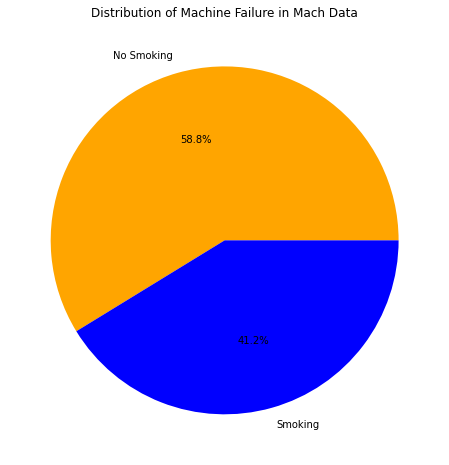

In [18]:
plt.figure(figsize=(8, 8))
target_counts = Heart['Smoking'].value_counts()
labels = ['No Smoking', 'Smoking']
colors = ['orange', 'blue']
plt.pie(target_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Machine Failure in Mach Data')
plt.show()

C:\Users\SDI\AppData\Local\Temp\ipykernel_14000\2885340434.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\SDI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


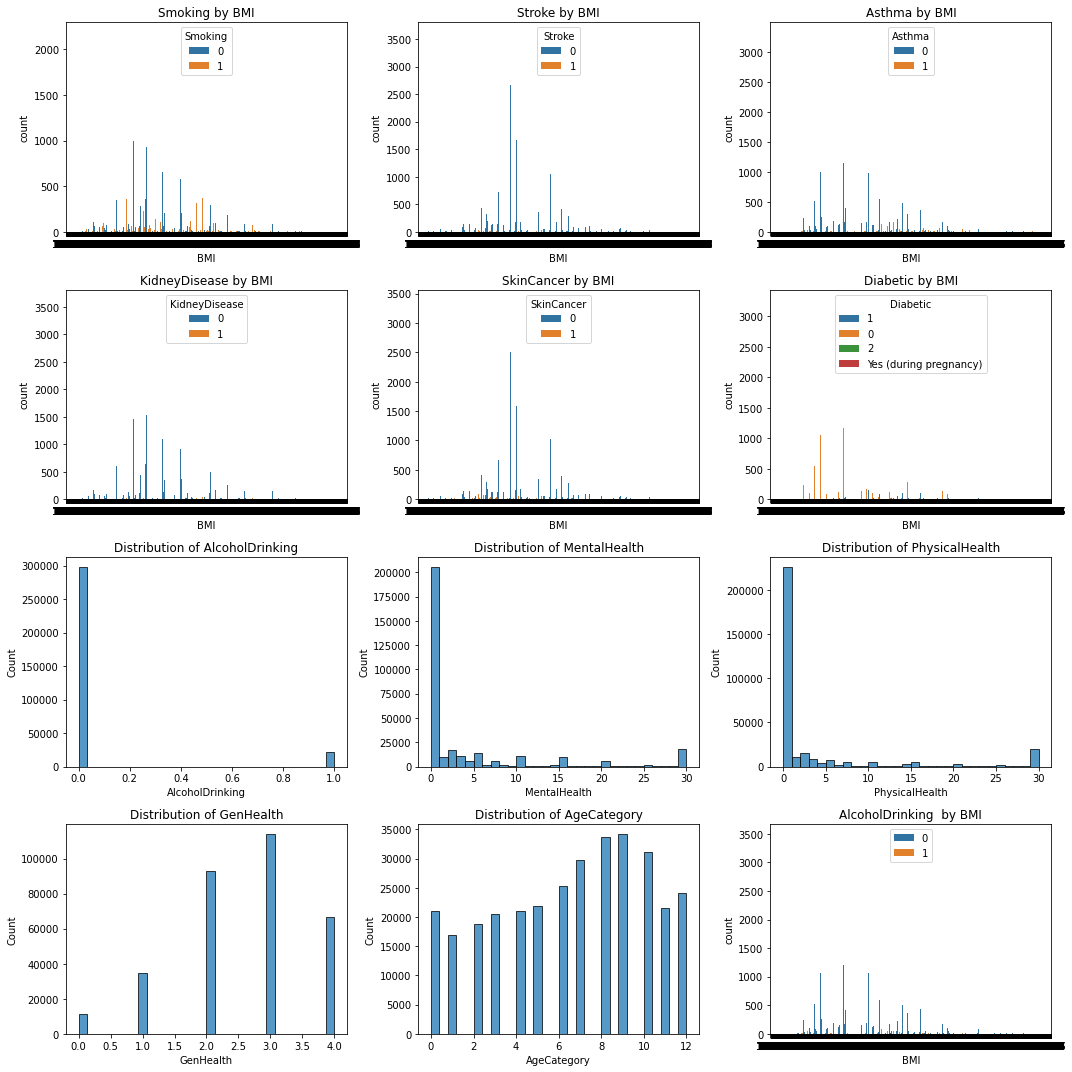

In [18]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
# Countplots
sns.countplot(x="BMI", hue="Smoking", data=Heart, ax=ax[0,0])
ax[0,0].set_title("Smoking by BMI")
sns.countplot(x="BMI", hue="Stroke", data=Heart, ax=ax[0,1])
ax[0,1].set_title("Stroke by BMI")
sns.countplot(x="BMI", hue="Asthma", data=Heart, ax=ax[0,2])
ax[0,2].set_title("Asthma by BMI")
sns.countplot(x="BMI", hue="KidneyDisease", data=Heart, ax=ax[1,0])
ax[1,0].set_title("KidneyDisease by BMI")
sns.countplot(x="BMI", hue="SkinCancer", data=Heart, ax=ax[1,1])
ax[1,1].set_title("SkinCancer by BMI")
sns.countplot(x="BMI", hue="Diabetic", data=Heart, ax=ax[1,2])
ax[1,2].set_title("Diabetic by BMI")
# Histograms
sns.histplot(x="AlcoholDrinking", data=Heart, ax=ax[2,0], bins=30)
ax[2,0].set_title("Distribution of AlcoholDrinking")
sns.histplot(x="MentalHealth", data=Heart, ax=ax[2,1], bins=30)
ax[2,1].set_title("Distribution of MentalHealth")
sns.histplot(x="PhysicalHealth", data=Heart, ax=ax[2,2], bins=30)
ax[2,2].set_title("Distribution of PhysicalHealth")
sns.histplot(x="GenHealth", data=Heart, ax=ax[3,0], bins=30)
ax[3,0].set_title("Distribution of GenHealth")
sns.histplot(x="AgeCategory", data=Heart, ax=ax[3,1], bins=30)
ax[3,1].set_title("Distribution of AgeCategory")
sns.countplot(x="BMI", hue="AlcoholDrinking", data=Heart, ax=ax[3,2])
handles, labels = ax[3,2].get_legend_handles_labels()
ax[3,2].legend(handles=handles[:10], labels=labels[:10])  # Only show top 10 legend entries
ax[3,2].set_title("AlcoholDrinking  by BMI")
plt.tight_layout()
plt.show()

<p><b>Encoding categorical variable
<p>Machine learning models usually require numeric input features. Categorical variables, which contain a finite set of discrete values, need to be transformed into numeric representations.</p></b></p>

In [19]:
# Create an instance of LabelEncoder for each column
encoder_product_id = LabelEncoder()
encoder_type = LabelEncoder()
# Fit the encoders and transform the columns
Heart['BMI'] = encoder_product_id.fit_transform(Heart['BMI'])
Heart['Smoking'] = encoder_type.fit_transform(Heart['Smoking'])
Heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3.0,30.0,0,0,7,0,1,1,3,5.0,1,0,1
1,0,524,0,0,1,0.0,0.0,0,0,12,0,0,1,3,7.0,0,0,0
2,0,1103,1,0,0,20.0,30.0,0,1,9,0,1,1,1,8.0,1,0,0
3,0,883,0,0,0,0.0,0.0,0,0,11,0,0,0,2,6.0,0,0,1
4,0,837,0,0,0,28.0,0.0,1,0,4,0,0,1,3,8.0,0,0,0


In [20]:
number_of_unique_values = Heart['BMI'].nunique()
print(number_of_unique_values)

3604


In [21]:
#color_palette = sns.color_palette("pastel", n_colors=2)
#color_palette = sns.color_palette("pastel")
# Use color_palette in sns.pairplot()
#g = sns.pairplot(Heart, hue="Smoking", palette=color_palette)
# Display the plot
#plt.show()

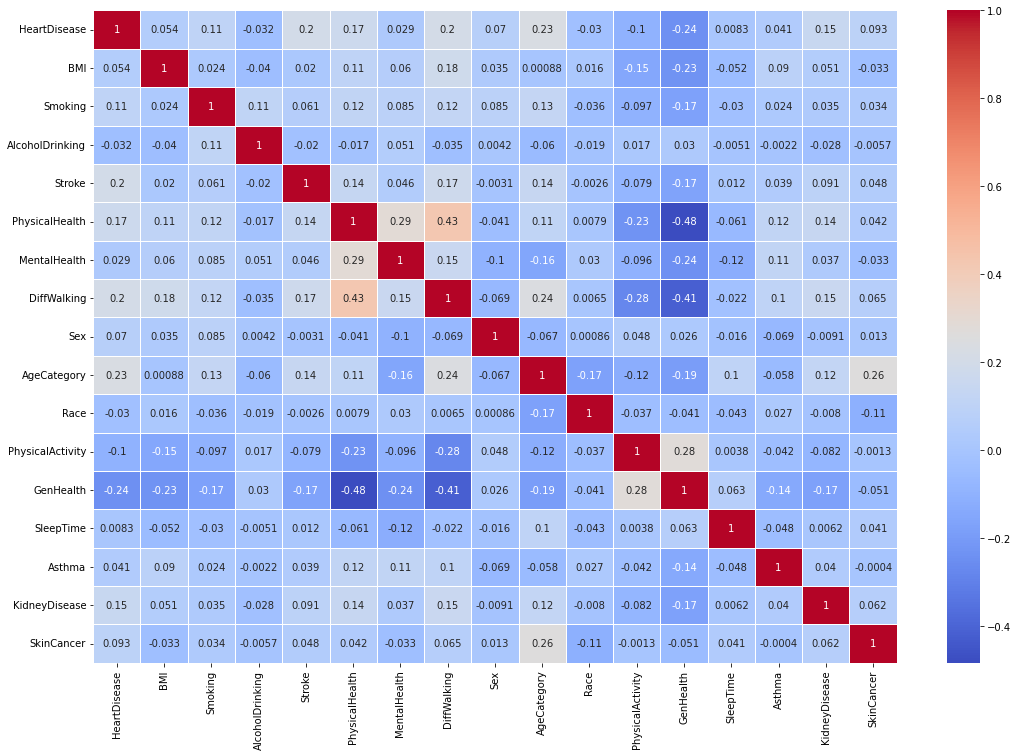

In [22]:
corr_matrix = Heart.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

<p><b>This code iterates through each column (i.e., feature) in the mach DataFrame and calculates the upper and lower bounds for outlier detection using the interquartile range (IQR) method.
For each feature, the first quartile (Q1), third quartile (Q3), and IQR are calculated using the quantile() function. The lower and upper bounds for outlier detection are calculated by subtracting and adding 1.5 times the IQR from Q1 and Q3, respectively.</b></p>

In [23]:
numeric_cols = Heart.select_dtypes(include=[np.number]).columns.tolist()
for feature in numeric_cols:
    Q1 = Heart[feature].quantile(0.25)
    Q3 = Heart[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    if Heart[(Heart[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

HeartDisease yes
BMI yes
Smoking no
AlcoholDrinking yes
Stroke yes
PhysicalHealth yes
MentalHealth yes
DiffWalking yes
Sex no
AgeCategory no
Race yes
PhysicalActivity no
GenHealth no
SleepTime yes
Asthma yes
KidneyDisease yes
SkinCancer yes


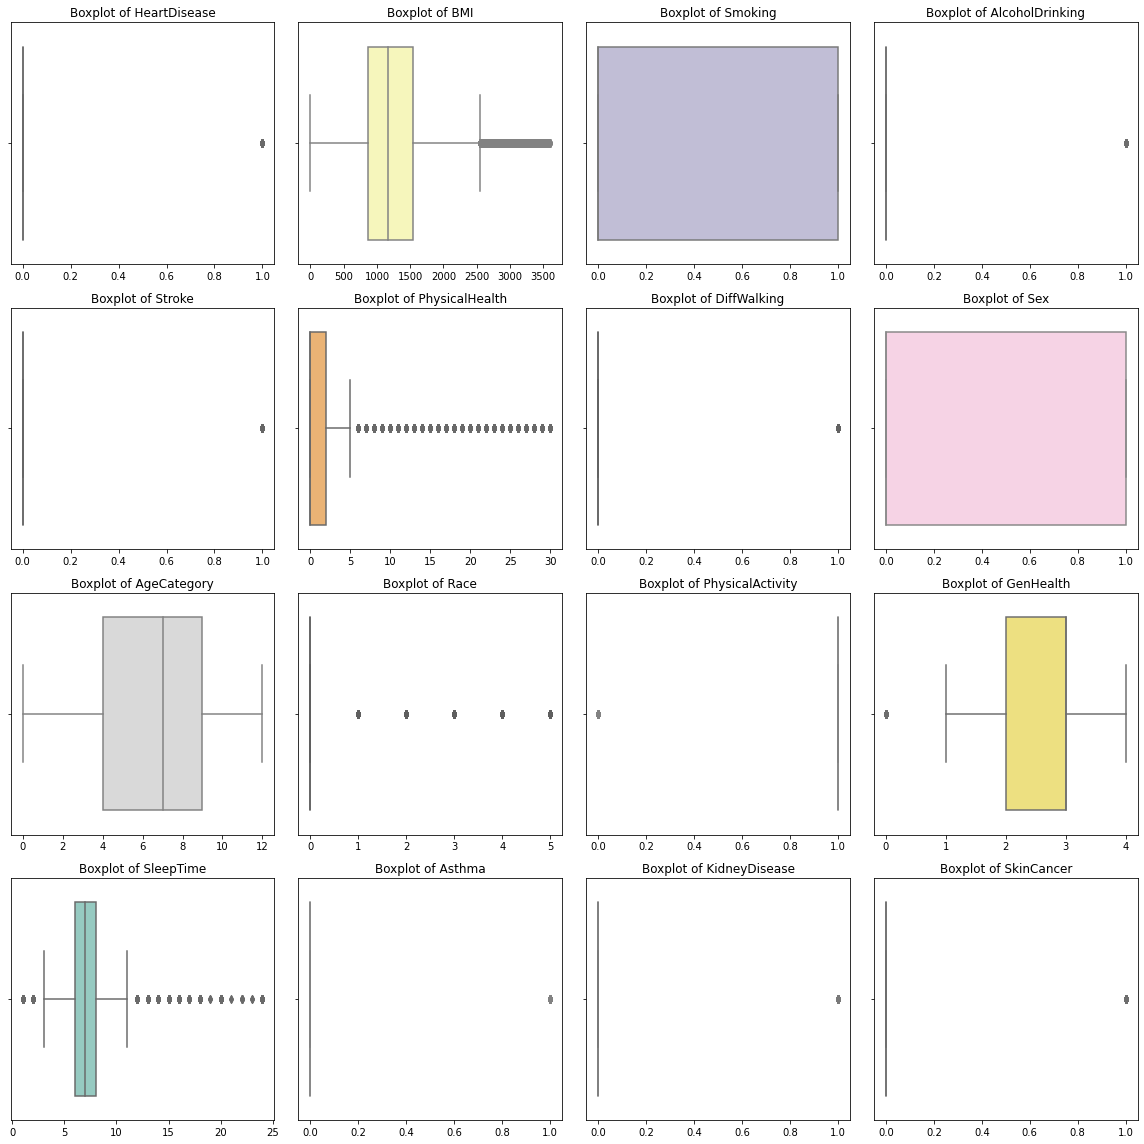

In [24]:
columns = [
    "HeartDisease", "BMI", "Smoking", "AlcoholDrinking", "Stroke", "PhysicalHealth", 
    "DiffWalking", "Sex", 
    "AgeCategory", "Race", 
    "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", 
    "KidneyDisease", "SkinCancer"
]
colors = sns.color_palette("Set3", n_colors=len(columns))
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i, col in enumerate(columns):
    row = i // 4  # determines the row in the subplot
    col_idx = i % 4  # determines the column in the subplot
    sns.boxplot(x=Heart[col], ax=axes[row, col_idx], color=colors[i], orient="h")
    axes[row, col_idx].set_title(f"Boxplot of {col}")
    axes[row, col_idx].set_xlabel('')  # Remove x-label for cleaner look
plt.tight_layout()
plt.show()

In [25]:
X=Heart.drop(columns=['HeartDisease'],axis=1)
Y=Heart["HeartDisease"]
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,223,1,0,0,3.0,30.0,0,0,7,0,1,1,3,5.0,1,0,1
1,524,0,0,1,0.0,0.0,0,0,12,0,0,1,3,7.0,0,0,0
2,1103,1,0,0,20.0,30.0,0,1,9,0,1,1,1,8.0,1,0,0
3,883,0,0,0,0.0,0.0,0,0,11,0,0,0,2,6.0,0,0,1
4,837,0,0,0,28.0,0.0,1,0,4,0,0,1,3,8.0,0,0,0


In [26]:
#!pip install imblearn

In [27]:
#!pip install imbalanced-learn

In [28]:
#pip install -U imbalanced-learn

In [29]:
#pip install --upgrade pip

In [30]:
#pip install xgboost

In [31]:
#pip install tabulate

In [32]:
#!pip install imbalanced-learn

In [33]:
#pip install --upgrade scikit-learn

In [34]:
#pip install -U scikit-learn

In [35]:
#!python -m pip install --upgrade pip

In [36]:
#pip install tensorflow

In [37]:
#!pip list

<p><b>More libraries are being imported for machine learning prediction</p></b>

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
#import xgboost as xgb
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from tabulate import tabulate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

In [40]:
df = pd.get_dummies(Heart)
X = df.drop(columns=['HeartDisease'])  # Replace 'target_column' with the name of your target column
Y = df['HeartDisease']  # Replace 'target_column' with the name of your target column

# Convert input data to float32
X = X.astype('float32')

<p><b>Import the train_test_split function from the sklearn.model_selection module.
Use the train_test_split function to split the input features (X) and target labels (Y) into training and testing sets. The test set size is specified as 20% of the total dataset (test_size=0.2). The random_state parameter is set to 42 to ensure the same data split is obtained each time the code is run, which is useful for reproducibility.
Print the shapes of the resulting training and testing sets: X_train, X_test, Y_train, and Y_test.</b></p>

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(255836, 20) (63959, 20) (255836,) (63959,)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,MaxPooling1D,Flatten

<p><b>Random Forest
    Random first is fitted to X_train and Y_train. When the algorithm has learned on it. It would use what it has learnt to predict a test accuracy and classification report on the test data</b></p>

In [43]:
# Convert input data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Flatten input data
#X_train_flat = X_train.reshape((X_train.shape[0], -1))
#X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Define the FFNN model
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

# Train the model
model1.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the train and test sets
ffnn_train_probs = model1.predict(X_train)
ffnn_train_preds = np.round(ffnn_train_probs).flatten()  # Round probabilities to 0 or 1 for binary 
ffnn_test_probs = model1.predict(X_test)
ffnn_test_preds = np.round(ffnn_test_probs).flatten()

# Calculate and print the accuracy scores
ffnn_train_accuracy = accuracy_score(Y_train, ffnn_train_preds)
ffnn_test_accuracy = accuracy_score(Y_test, ffnn_test_preds)
print(f"Feedforward Neural Network Train Accuracy: {ffnn_train_accuracy:.4f}")
print(f"Feedforward Neural Network Test Accuracy: {ffnn_test_accuracy:.4f}")

# Print the classification reports as tables
train_report = classification_report(Y_train, ffnn_train_preds, output_dict=True)
test_report = classification_report(Y_test, ffnn_test_preds, output_dict=True)
train_report_df = pd.DataFrame(train_report).transpose()
test_report_df = pd.DataFrame(test_report).transpose()

print("Feedforward Neural Network Train Classification Report:")
print(tabulate(train_report_df, headers='keys', tablefmt='psql'))
print("Feedforward Neural Network Test Classification Report:")
print(tabulate(test_report_df, headers='keys', tablefmt='psql'))



Epoch 1/10


7995/7995 [==============================] - 23s 2ms/step - loss: 0.5768 - accuracy: 0.8970
Epoch 2/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2880 - accuracy: 0.9056
Epoch 3/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2564 - accuracy: 0.9111
Epoch 4/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2387 - accuracy: 0.9144
Epoch 5/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2335 - accuracy: 0.9155
Epoch 6/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2317 - accuracy: 0.9155
Epoch 7/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2309 - accuracy: 0.9157
Epoch 8/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2296 - accuracy: 0.9158
Epoch 9/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2291 - accuracy: 0.9159
Epoch 10/10
1999/1999 [==============================] - 3s 2ms/step


TN=58362, FP=5, FN=5582, TP=10


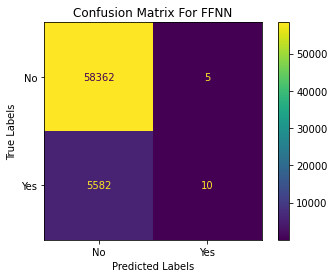

In [44]:
cm = metrics.confusion_matrix(Y_test, ffnn_test_preds)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
# Define label names
label_names = ['No', 'Yes']
# Plot the confusion matrix using sklearn's confusion matrix display
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For FFNN')
plt.show()

In [45]:
# Define the DFFNN model
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification, adjust units for multiclass
])

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',  # Assuming binary classification, adjust for multiclass
              metrics=['accuracy'])

# Train the model
model2.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the train and test sets
dffnn_train_probs = model2.predict(X_train)
dffnn_train_preds = np.round(dffnn_train_probs).flatten()  # Round probabilities to 0 or 1 for binary classification
dffnn_test_probs = model2.predict(X_test)
dffnn_test_preds = np.round(dffnn_test_probs).flatten()

# Calculate and print the accuracy scores
dffnn_train_accuracy = accuracy_score(Y_train, dffnn_train_preds)
dffnn_test_accuracy = accuracy_score(Y_test, dffnn_test_preds)
print(f"DFFNN Train Accuracy: {dffnn_train_accuracy:.4f}")
print(f"DFFNN Test Accuracy: {dffnn_test_accuracy:.4f}")

# Print the classification reports as tables
train_report = classification_report(Y_train, dffnn_train_preds, output_dict=True)
test_report = classification_report(Y_test, dffnn_test_preds, output_dict=True)
train_report_df = pd.DataFrame(train_report).transpose()
test_report_df = pd.DataFrame(test_report).transpose()

print("DFFNN Train Classification Report:")
print(tabulate(train_report_df, headers='keys', tablefmt='psql'))
print("DFFNN Test Classification Report:")
print(tabulate(test_report_df, headers='keys', tablefmt='psql'))

Epoch 1/10
7995/7995 [==============================] - 20s 2ms/step - loss: 0.3081 - accuracy: 0.9076
Epoch 2/10
7995/7995 [==============================] - 20s 3ms/step - loss: 0.2430 - accuracy: 0.9147
Epoch 3/10
7995/7995 [==============================] - 21s 3ms/step - loss: 0.2399 - accuracy: 0.9148
Epoch 4/10
7995/7995 [==============================] - 21s 3ms/step - loss: 0.2363 - accuracy: 0.9148
Epoch 5/10
7995/7995 [==============================] - 20s 2ms/step - loss: 0.2330 - accuracy: 0.9150
Epoch 6/10
7995/7995 [==============================] - 20s 2ms/step - loss: 0.2315 - accuracy: 0.9156
Epoch 7/10
7995/7995 [==============================] - 20s 2ms/step - loss: 0.2308 - accuracy: 0.9156
Epoch 8/10
7995/7995 [==============================] - 20s 2ms/step - loss: 0.2297 - accuracy: 0.9157
Epoch 9/10
7995/7995 [==============================] - 20s 2ms/step - loss: 0.2295 - accuracy: 0.9162
Epoch 10/10
1999/1999 [==============================] - 3s 2ms/step
DFFN

TN=57996, FP=371, FN=5149, TP=443


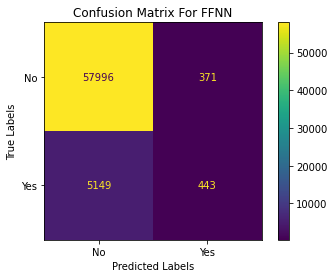

In [46]:
cm = metrics.confusion_matrix(Y_test, dffnn_test_preds)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
# Define label names
label_names = ['No', 'Yes']
# Plot the confusion matrix using sklearn's confusion matrix display
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For FFNN')
plt.show()

In [47]:
''''
# Define the Autoencoder model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),  # Decoder
    Dense(X_train.shape[1], activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse')  # Mean Squared Error is commonly used for Autoencoders

# Train the model
model.fit(X_train, X_train, epochs=10, batch_size=32, verbose=1)

# Calculate the Mean Squared Error (MSE) for the Autoencoder
ae_train_mse = np.mean(np.square(X_train - ae_train_preds), axis=1)
ae_test_mse = np.mean(np.square(X_test - ae_test_preds), axis=1)

# Print the MSE values with formatting
print(f"Autoencoder Train MSE: {np.mean(ae_train_mse):.4f}")
print(f"Autoencoder Test MSE: {np.mean(ae_test_mse):.4f}")


# Convert Pandas Series objects to float values for accuracy calculation
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')

# Calculate and print the accuracy scores
ae_train_accuracy = model.evaluate(X_train, X_train, verbose=0)
ae_test_accuracy = model.evaluate(X_test, X_test, verbose=0)
print(f"Autoencoder Train Accuracy: {ae_train_accuracy:.4f}")
print(f"Autoencoder Test Accuracy: {ae_test_accuracy:.4f}")
'''

'\'\n# Define the Autoencoder model\nmodel = Sequential([\n    Dense(64, activation=\'relu\', input_shape=(X_train.shape[1],)),\n    Dense(32, activation=\'relu\'),\n    Dense(64, activation=\'relu\'),  # Decoder\n    Dense(X_train.shape[1], activation=\'sigmoid\')  # Output layer\n])\n\n# Compile the model\nmodel.compile(optimizer=\'adam\',\n              loss=\'mse\')  # Mean Squared Error is commonly used for Autoencoders\n\n# Train the model\nmodel.fit(X_train, X_train, epochs=10, batch_size=32, verbose=1)\n\n# Calculate the Mean Squared Error (MSE) for the Autoencoder\nae_train_mse = np.mean(np.square(X_train - ae_train_preds), axis=1)\nae_test_mse = np.mean(np.square(X_test - ae_test_preds), axis=1)\n\n# Print the MSE values with formatting\nprint(f"Autoencoder Train MSE: {np.mean(ae_train_mse):.4f}")\nprint(f"Autoencoder Test MSE: {np.mean(ae_test_mse):.4f}")\n\n\n# Convert Pandas Series objects to float values for accuracy calculation\nY_train = Y_train.astype(\'float32\')\nY_t

In [48]:
# Define the RBM layer
class RBM(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        super(RBM, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='random_normal',
                                 trainable=True)
        self.c = self.add_weight(shape=(input_shape[-1],),
                                 initializer='random_normal',
                                 trainable=True)

    def call(self, inputs):
        v = inputs
        h = tf.nn.sigmoid(tf.matmul(v, self.W) + self.b)
        return h

# Create RBM layers
rbm1 = RBM(units=100)
rbm2 = RBM(units=100)

# Define the DBN model
model3 = tf.keras.Sequential([
    rbm1,
    rbm2,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model3.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the train and test sets
dbn_train_probs = model3.predict(X_train)
dbn_train_preds = np.round(dbn_train_probs).flatten()
dbn_test_probs = model3.predict(X_test)
dbn_test_preds = np.round(dbn_test_probs).flatten()

# Calculate and print the accuracy scores
dbn_train_accuracy = accuracy_score(Y_train, dbn_train_preds)
dbn_test_accuracy = accuracy_score(Y_test, dbn_test_preds)
print(f"DBN Train Accuracy: {dbn_train_accuracy:.4f}")
print(f"DBN Test Accuracy: {dbn_test_accuracy:.4f}")

# Print the classification reports as tables
train_report = classification_report(Y_train, dbn_train_preds, output_dict=True)
test_report = classification_report(Y_test, dbn_test_preds, output_dict=True)
train_report_df = pd.DataFrame(train_report).transpose()
test_report_df = pd.DataFrame(test_report).transpose()

print("DBN Train Classification Report:")
print(tabulate(train_report_df, headers='keys', tablefmt='psql'))
print("DBN Test Classification Report:")
print(tabulate(test_report_df, headers='keys', tablefmt='psql'))

Epoch 1/10
7995/7995 [==============================] - 21s 2ms/step - loss: 0.2515 - accuracy: 0.9145
Epoch 2/10
7995/7995 [==============================] - 19s 2ms/step - loss: 0.2389 - accuracy: 0.9148
Epoch 3/10
7995/7995 [==============================] - 19s 2ms/step - loss: 0.2385 - accuracy: 0.9149
Epoch 4/10
7995/7995 [==============================] - 19s 2ms/step - loss: 0.2380 - accuracy: 0.9149
Epoch 5/10
7995/7995 [==============================] - 19s 2ms/step - loss: 0.2373 - accuracy: 0.9149
Epoch 6/10
7995/7995 [==============================] - 21s 3ms/step - loss: 0.2361 - accuracy: 0.9149
Epoch 7/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2353 - accuracy: 0.9149
Epoch 8/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2359 - accuracy: 0.9149
Epoch 9/10
7995/7995 [==============================] - 19s 2ms/step - loss: 0.2351 - accuracy: 0.9149
Epoch 10/10
1999/1999 [==============================] - 4s 2ms/step
DBN 

C:\Users\SDI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SDI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SDI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TN=58367, FP=0, FN=5592, TP=0


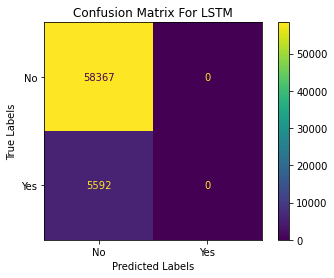

In [49]:
cm = metrics.confusion_matrix(Y_test, dbn_test_preds)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
# Define label names
label_names = ['No', 'Yes']
# Plot the confusion matrix using sklearn's confusion matrix display
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For LSTM')
plt.show()

In [50]:
from tensorflow.keras.layers import LSTM, Dense

# Assuming you already have X_train, X_test, Y_train, Y_test from your dataset
# Train-test split if not done already
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert DataFrame or Series to NumPy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model4 = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')  # Assuming binary classification, adjust units for multiclass
])

# Compile the model
model4.compile(optimizer='adam',
              loss='binary_crossentropy',  # Assuming binary classification, adjust for multiclass
              metrics=['accuracy'])

# Train the model
model4.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the train and test sets
lstm_train_probs = model4.predict(X_train)
lstm_train_preds = np.round(lstm_train_probs).flatten()  # Round probabilities to 0 or 1 for binary classification
lstm_test_probs = model4.predict(X_test)
lstm_test_preds = np.round(lstm_test_probs).flatten()

# Calculate and print the accuracy scores
lstm_train_accuracy = accuracy_score(Y_train, lstm_train_preds)
lstm_test_accuracy = accuracy_score(Y_test, lstm_test_preds)
print(f"LSTM Train Accuracy: {lstm_train_accuracy:.4f}")
print(f"LSTM Test Accuracy: {lstm_test_accuracy:.4f}")

# Print the classification reports as tables
train_report = classification_report(Y_train, lstm_train_preds, output_dict=True)
test_report = classification_report(Y_test, lstm_test_preds, output_dict=True)
train_report_df = pd.DataFrame(train_report).transpose()
test_report_df = pd.DataFrame(test_report).transpose()

print("LSTM Train Classification Report:")
print(tabulate(train_report_df, headers='keys', tablefmt='psql'))
print("LSTM Test Classification Report:")
print(tabulate(test_report_df, headers='keys', tablefmt='psql'))

Epoch 1/10
7995/7995 [==============================] - 90s 11ms/step - loss: 0.2424 - accuracy: 0.9149
Epoch 2/10
7995/7995 [==============================] - 84s 11ms/step - loss: 0.2310 - accuracy: 0.9153
Epoch 3/10
7995/7995 [==============================] - 84s 11ms/step - loss: 0.2266 - accuracy: 0.9160
Epoch 4/10
7995/7995 [==============================] - 83s 10ms/step - loss: 0.2256 - accuracy: 0.9162
Epoch 5/10
7995/7995 [==============================] - 83s 10ms/step - loss: 0.2252 - accuracy: 0.9163
Epoch 6/10
7995/7995 [==============================] - 83s 10ms/step - loss: 0.2249 - accuracy: 0.9165
Epoch 7/10
7995/7995 [==============================] - 84s 10ms/step - loss: 0.2248 - accuracy: 0.9166
Epoch 8/10
7995/7995 [==============================] - 81s 10ms/step - loss: 0.2246 - accuracy: 0.9165
Epoch 9/10
7995/7995 [==============================] - 81s 10ms/step - loss: 0.2245 - accuracy: 0.9166
Epoch 10/10
1999/1999 [==============================] - 10s 5ms

<p><b>Plot a confusion matrix to determine the true positive, false postive, flase negative and false positive</b></p>

TN=58053, FP=314, FN=5169, TP=423


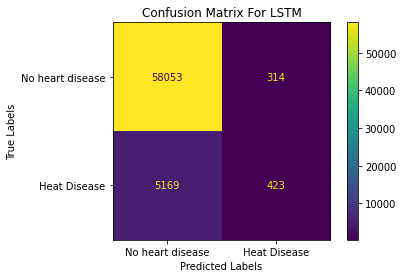

In [54]:
cm = metrics.confusion_matrix(Y_test, lstm_test_preds)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
# Define label names
label_names = ['No heart disease', 'Heat Disease']
# Plot the confusion matrix using sklearn's confusion matrix display
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For LSTM')
plt.show()

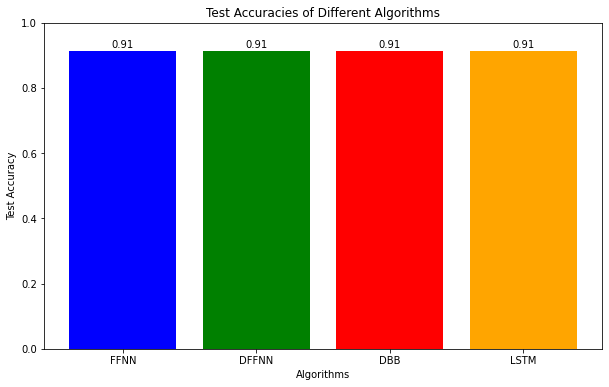

In [53]:
accuracies = {
    'FFNN': ffnn_test_accuracy,
    'DFFNN': dffnn_test_accuracy,
    'DBB': dbn_test_accuracy,
    'LSTM': lstm_test_accuracy,
       }
# Update the colors for each bar
colors = ['blue', 'green', 'red', 'orange', 'purple']
# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(accuracies.keys(), accuracies.values(), color=colors)
ax.set_xlabel('Algorithms')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracies of Different Algorithms')
ax.set_ylim([0, 1])
# Add the accuracy values on top of the bars
for i, acc in enumerate(accuracies.values()):
    plt.text(i, acc + 0.005, f'{acc:.2f}', ha='center', va='bottom')
# Display the chart
plt.show()

<p><b>ROC curve  It is used to assess the accuracy of a classification model by plotting the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds.
The TPR, also known as sensitivity or recall, measures the proportion of actual positive cases that are correctly identified by the classifier. This graph also shows logistic regression is the best model, followed by naive bays and random forest while decision tree is the least</b></p>

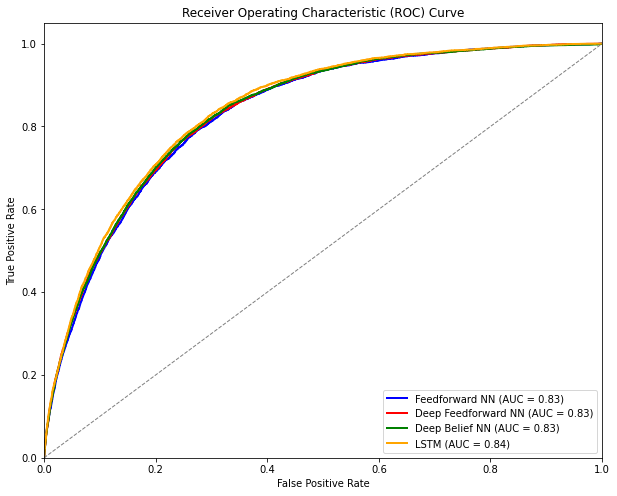

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for each algorithm

# Feedforward Neural Network
ffnn_fpr, ffnn_tpr, _ = roc_curve(Y_test, ffnn_test_probs)
ffnn_roc_auc = auc(ffnn_fpr, ffnn_tpr)

# Deep Feedforward Neural Network
dffnn_fpr, dffnn_tpr, _ = roc_curve(Y_test, dffnn_test_probs)
dffnn_roc_auc = auc(dffnn_fpr, dffnn_tpr)

# Deep Belief Network
dbn_fpr, dbn_tpr, _ = roc_curve(Y_test, dbn_test_probs)
dbn_roc_auc = auc(dbn_fpr, dbn_tpr)

# Long Short-Term Memory Network
lstm_fpr, lstm_tpr, _ = roc_curve(Y_test, lstm_test_probs)
lstm_roc_auc = auc(lstm_fpr, lstm_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(ffnn_fpr, ffnn_tpr, color='blue', lw=2, label=f'Feedforward NN (AUC = {ffnn_roc_auc:.2f})')
plt.plot(dffnn_fpr, dffnn_tpr, color='red', lw=2, label=f'Deep Feedforward NN (AUC = {dffnn_roc_auc:.2f})')
plt.plot(dbn_fpr, dbn_tpr, color='green', lw=2, label=f'Deep Belief NN (AUC = {dbn_roc_auc:.2f})')
plt.plot(lstm_fpr, lstm_tpr, color='orange', lw=2, label=f'LSTM (AUC = {lstm_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<p><b>Features importance for RANDOM FOREST. We plot this, because it has overall best performance. This plot shows the importance feature this algorithms used to predict</b></p>

In [56]:
# Get the weights of the first hidden layer for FFNN
ffnn_weights = model1.layers[0].get_weights()[0]

# Get the weights of the first hidden layer for DFFNN
dffnn_weights = model2.layers[0].get_weights()[0]

# Calculate feature importance based on weights
ffnn_feature_importance = np.abs(ffnn_weights).sum(axis=1)
dffnn_feature_importance = np.abs(dffnn_weights).sum(axis=1)

In [60]:
# Get the weights of the RBM layers
rbm1_weights = rbm1.get_weights()[0]
rbm2_weights = rbm2.get_weights()[0]

# If rbm1_weights has fewer features, reshape it to match the shape of rbm2_weights
if rbm1_weights.shape[0] < rbm2_weights.shape[0]:
    rbm1_weights = np.pad(rbm1_weights, ((0, rbm2_weights.shape[0] - rbm1_weights.shape[0]), (0, 0)), mode='constant')

# If rbm2_weights has fewer features, reshape it to match the shape of rbm1_weights
elif rbm2_weights.shape[0] < rbm1_weights.shape[0]:
    rbm2_weights = np.pad(rbm2_weights, ((0, rbm1_weights.shape[0] - rbm2_weights.shape[0]), (0, 0)), mode='constant')

# Concatenate the weights along the appropriate axis
concatenated_weights = np.concatenate((rbm1_weights, rbm2_weights), axis=1)

# Calculate feature importance based on concatenated RBM weights
dbn_feature_importance = np.abs(concatenated_weights).sum(axis=1)

In [57]:
from keras.models import Model
# Train the model again if necessary to obtain intermediate outputs
intermediate_layer_model = Model(inputs=model4.input, outputs=model4.layers[0].output)

# Get intermediate outputs
intermediate_output = intermediate_layer_model.predict(X_train)

# Calculate feature importance based on intermediate outputs
feature_importance = np.abs(intermediate_output).mean(axis=0)

7995/7995 [==============================] - 43s 5ms/step


In [61]:
print(len(feature_names))
print(len(dbn_feature_importance))

20
100


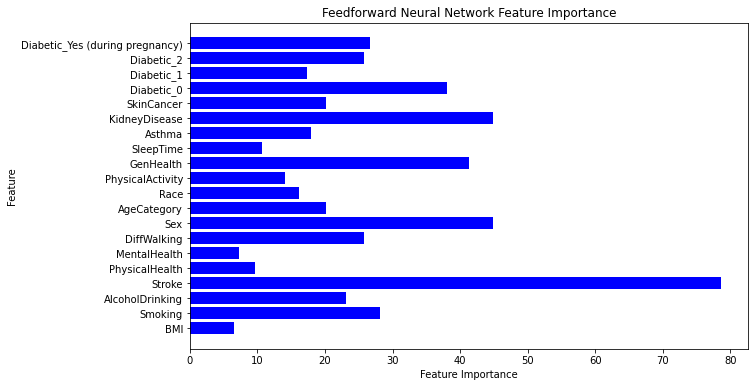

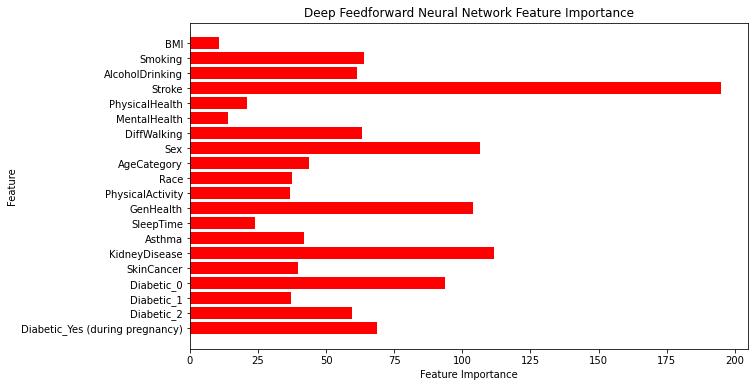

In [62]:
import matplotlib.pyplot as plt

# Get the column names of your dataset (assuming it's a pandas DataFrame)
feature_names = X.columns.tolist()

# Plot FFNN feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, ffnn_feature_importance, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feedforward Neural Network Feature Importance')
plt.show()

# Plot DFFNN feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, dffnn_feature_importance, color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Deep Feedforward Neural Network Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

<p><b>SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique used to balance class distribution in imbalanced datasets, particularly for classification problems. Imbalanced datasets can cause classification models to be biased towards the majority class, resulting in poor predictive performance for the minority class. we are applying smote to balance the dataset and see if we can further improve our algorithm</b></p>

In [63]:
print("Number of samples in each class before SMOTE:")
print(Y_train.value_counts())
X_train_2d = X_train.reshape((X_train.shape[0], X_train.shape[1]))
# Apply SMOTE
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train_2d, Y_train)
print("Number of samples in each class after SMOTE:")
print(Y_train_smote.value_counts())

Number of samples in each class before SMOTE:
0    234055
1     21781
Name: HeartDisease, dtype: int64
Number of samples in each class after SMOTE:
0    234055
1    234055
Name: HeartDisease, dtype: int64


<p><b>Robust Scaler is a preprocessing technique used in machine learning to standardize and scale the features of a dataset, making them less sensitive to the presence of outliers.I scaled the smote data because robust scaled to reduce presence of outliers</b></p>

In [64]:
from sklearn.preprocessing import RobustScaler
# Create an instance of RobustScaler
scaler = RobustScaler()
# Apply RobustScaler to the training data
X_train_scaled = scaler.fit_transform(X_train_smote)
# Apply RobustScaler to the test data
X_test_2d = X_test.reshape((X_test.shape[0], X_test.shape[1]))
X_test_scaled = scaler.transform(X_test_2d)
# Get the column names from the original DataFrame
column_names = X.columns

# Convert the scaled arrays back to DataFrames
X_train_rob = pd.DataFrame(X_train_scaled, columns=column_names)
X_test_rob = pd.DataFrame(X_test_scaled, columns=column_names)
# Print the scaled DataFrames
print("Scaled X_train:")
print(X_train_rob)
print("\nScaled X_test:")
print(X_test_rob)

Scaled X_train:
             BMI   Smoking  AlcoholDrinking    Stroke  PhysicalHealth  \
0      -0.594828  0.538500         0.000000  0.000000        0.000000   
1      -0.044540  0.538500         0.000000  1.000000        6.837902   
2       0.620690 -0.461500         0.000000  0.000000        0.455860   
3       0.449713 -0.461500         0.000000  0.000000        0.000000   
4      -0.420977  0.538500         0.000000  0.000000        0.455860   
...          ...       ...              ...       ...             ...   
468105  0.297414  0.538500         0.000000  0.029309        0.000000   
468106  0.952201  0.270694         0.267805  0.000000        0.000000   
468107  0.521552  0.538500         0.000000  1.000000        6.837902   
468108 -0.160920  0.538500         0.000000  0.000000        0.000000   
468109 -0.357759  0.538500         0.000000  0.000000        0.000000   

        MentalHealth  DiffWalking       Sex  AgeCategory      Race  \
0           0.000000     0.000000  0.

<p><b>FFNN with SMOTE and Robust Scaler</b></p>

In [65]:
# Reshape the input data for FFNN
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))  # Flatten the data
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Apply SMOTE to the reshaped training data
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train_reshaped, Y_train)

# Define the FFNN model
model5 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_reshaped.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile and train the model on SMOTE-resampled data
model5.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

model5.fit(X_train_smote, Y_train_smote, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
ffnn_test_probs_smote = model5.predict(X_test_reshaped)
ffnn_test_preds_smote = np.round(ffnn_test_probs_smote).flatten()

# Evaluate the model's performance
ffnn_test_accuracy_smote = accuracy_score(Y_test, ffnn_test_preds_smote)
print(f"Feedforward Neural Network Test Accuracy with SMOTE: {ffnn_test_accuracy_smote:.4f}")

Epoch 1/10
14629/14629 [==============================] - 34s 2ms/step - loss: 0.7009 - accuracy: 0.7116
Epoch 2/10
14629/14629 [==============================] - 32s 2ms/step - loss: 0.5313 - accuracy: 0.7468
Epoch 3/10
14629/14629 [==============================] - 32s 2ms/step - loss: 0.4920 - accuracy: 0.7661
Epoch 4/10
14629/14629 [==============================] - 32s 2ms/step - loss: 0.4796 - accuracy: 0.7729
Epoch 5/10
14629/14629 [==============================] - 32s 2ms/step - loss: 0.4758 - accuracy: 0.7752
Epoch 6/10
14629/14629 [==============================] - 32s 2ms/step - loss: 0.4737 - accuracy: 0.7763
Epoch 7/10
14629/14629 [==============================] - 32s 2ms/step - loss: 0.4717 - accuracy: 0.7776
Epoch 8/10
14629/14629 [==============================] - 32s 2ms/step - loss: 0.4704 - accuracy: 0.7788
Epoch 9/10
14629/14629 [==============================] - 31s 2ms/step - loss: 0.4681 - accuracy: 0.7800
Epoch 10/10
1999/1999 [==============================] 

In [86]:
# Make predictions on the test set
ffnn_test_probs_smote = model5.predict(X_test_reshaped)
ffnn_test_preds_smote = np.round(ffnn_test_probs_smote).flatten()

# Generate classification report
ffnn_classification_report = classification_report(Y_test, ffnn_test_preds_smote, output_dict=True)
ffnn_classification_report_df = pd.DataFrame(ffnn_classification_report).transpose()

# Tabulate classification report
print("Classification Report for FFNN with SMOTE:")
print(tabulate(ffnn_classification_report_df, headers='keys', tablefmt='psql'))

1999/1999 [==============================] - 3s 1ms/step
Classification Report for FFNN with SMOTE:
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| 0            |    0.978337 | 0.672383 |   0.797007 | 58367       |
| 1            |    0.198071 | 0.844599 |   0.320889 |  5592       |
| accuracy     |    0.68744  | 0.68744  |   0.68744  |     0.68744 |
| macro avg    |    0.588204 | 0.758491 |   0.558948 | 63959       |
| weighted avg |    0.910117 | 0.68744  |   0.755379 | 63959       |
+--------------+-------------+----------+------------+-------------+


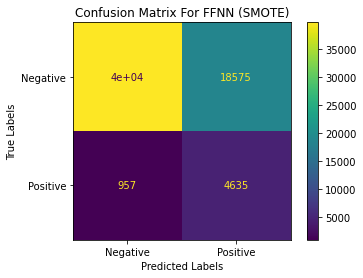

In [66]:
# Generate confusion matrix for FFNN
cm_ffnn = metrics.confusion_matrix(Y_test, ffnn_test_preds_smote)

# Define label names
label_names_ffnn = ['Negative', 'Positive']

# Plot the confusion matrix for FFNN
disp_ffnn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_ffnn, display_labels=label_names_ffnn)
disp_ffnn.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For FFNN (SMOTE)')
plt.show()

In [67]:
# Reshape the input data for DFFNN
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))  # Flatten the data
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Apply SMOTE to the reshaped training data
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train_reshaped, Y_train)

# Define the DFFNN model (model6)
model6 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_reshaped.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile and train the model on SMOTE-resampled data
model6.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model6.fit(X_train_smote, Y_train_smote, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
dffnn_test_probs_smote = model6.predict(X_test_reshaped)
dffnn_test_preds_smote = np.round(dffnn_test_probs_smote).flatten()

# Evaluate the model's performance
dffnn_test_accuracy_smote = accuracy_score(Y_test, dffnn_test_preds_smote)
print(f"DFFNN Test Accuracy with SMOTE: {dffnn_test_accuracy_smote:.4f}")

Epoch 1/10
14629/14629 [==============================] - 39s 3ms/step - loss: 0.5954 - accuracy: 0.7357
Epoch 2/10
14629/14629 [==============================] - 36s 2ms/step - loss: 0.4886 - accuracy: 0.7684
Epoch 3/10
14629/14629 [==============================] - 35s 2ms/step - loss: 0.4815 - accuracy: 0.7727
Epoch 4/10
14629/14629 [==============================] - 39s 3ms/step - loss: 0.4765 - accuracy: 0.7754
Epoch 5/10
14629/14629 [==============================] - 36s 2ms/step - loss: 0.4729 - accuracy: 0.7773
Epoch 6/10
14629/14629 [==============================] - 35s 2ms/step - loss: 0.4704 - accuracy: 0.7787
Epoch 7/10
14629/14629 [==============================] - 36s 2ms/step - loss: 0.4676 - accuracy: 0.7806
Epoch 8/10
14629/14629 [==============================] - 36s 2ms/step - loss: 0.4649 - accuracy: 0.7817
Epoch 9/10
14629/14629 [==============================] - 36s 2ms/step - loss: 0.4624 - accuracy: 0.7825
Epoch 10/10
1999/1999 [==============================] 

In [68]:
print("Shape of X_test:", X_test.shape)
print("Expected input shape of the model:", model6.input_shape)

Shape of X_test: (63959, 20, 1)
Expected input shape of the model: (None, 20)


In [69]:
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1]))


In [70]:
# Make predictions on the test set for DFFNN
dffnn_test_probs_smote = model6.predict(X_test_reshaped)
dffnn_test_preds_smote = np.round(dffnn_test_probs_smote).flatten()

# Generate classification report for DFFNN
dffnn_classification_report = classification_report(Y_test, dffnn_test_preds_smote, output_dict=True)
dffnn_classification_report_df = pd.DataFrame(dffnn_classification_report).transpose()

# Tabulate classification report for DFFNN
print("Classification Report for DFFNN with SMOTE:")
print(tabulate(dffnn_classification_report_df, headers='keys', tablefmt='psql'))


1999/1999 [==============================] - 3s 2ms/step
Classification Report for DFFNN with SMOTE:
+--------------+-------------+----------+------------+--------------+
|              |   precision |   recall |   f1-score |      support |
|--------------+-------------+----------+------------+--------------|
| 0            |    0.976778 | 0.673823 |   0.797498 | 58367        |
| 1            |    0.196539 | 0.832797 |   0.318025 |  5592        |
| accuracy     |    0.687722 | 0.687722 |   0.687722 |     0.687722 |
| macro avg    |    0.586659 | 0.75331  |   0.557761 | 63959        |
| weighted avg |    0.908561 | 0.687722 |   0.755577 | 63959        |
+--------------+-------------+----------+------------+--------------+


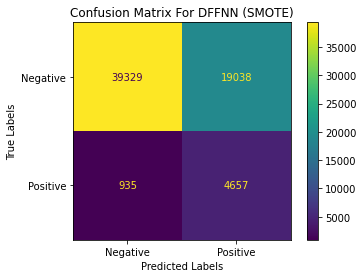

In [71]:
# Generate confusion matrix for DFFNN
cm_dffnn = metrics.confusion_matrix(Y_test, dffnn_test_preds_smote)

# Define label names
label_names_dffnn = ['Negative', 'Positive']

# Plot the confusion matrix for DFFNN
disp_dffnn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_dffnn, display_labels=label_names_dffnn)
disp_dffnn.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For DFFNN (SMOTE)')
plt.show()

In [75]:
from imblearn.over_sampling import SMOTE
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score

# Reshape the input data for DFFNN
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))  # Flatten the data
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Apply SMOTE to both the reshaped training data and target variable
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train_reshaped, Y_train)

# Define the RBM model (model7)
rbm1 = RBM(units=100)
rbm2 = RBM(units=100)
model7 = tf.keras.Sequential([
    rbm1,
    rbm2,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model on SMOTE-resampled data
model7.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model7.fit(X_train_smote, Y_train_smote, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
rbm_test_probs_smote = model7.predict(X_test_reshaped)
rbm_test_preds_smote = np.round(rbm_test_probs_smote).flatten()

# Evaluate the model's performance
rbm_test_accuracy_smote = accuracy_score(Y_test, rbm_test_preds_smote)
print(f"RBM Test Accuracy with SMOTE: {rbm_test_accuracy_smote:.4f}")

Epoch 1/10
14629/14629 [==============================] - 36s 2ms/step - loss: 0.4994 - accuracy: 0.7592
Epoch 2/10
14629/14629 [==============================] - 34s 2ms/step - loss: 0.4872 - accuracy: 0.7705
Epoch 3/10
14629/14629 [==============================] - 33s 2ms/step - loss: 0.4835 - accuracy: 0.7726
Epoch 4/10
14629/14629 [==============================] - 33s 2ms/step - loss: 0.4820 - accuracy: 0.7735
Epoch 5/10
14629/14629 [==============================] - 34s 2ms/step - loss: 0.4805 - accuracy: 0.7746
Epoch 6/10
14629/14629 [==============================] - 33s 2ms/step - loss: 0.4803 - accuracy: 0.7739
Epoch 7/10
14629/14629 [==============================] - 33s 2ms/step - loss: 0.4780 - accuracy: 0.7754
Epoch 8/10
14629/14629 [==============================] - 34s 2ms/step - loss: 0.4768 - accuracy: 0.7758
Epoch 9/10
14629/14629 [==============================] - 33s 2ms/step - loss: 0.4763 - accuracy: 0.7762
Epoch 10/10
1999/1999 [==============================] 

In [77]:
# Make predictions on the test set for RBM
rbm_test_probs_smote = model7.predict(X_test_reshaped)
rbm_test_preds_smote = np.round(rbm_test_probs_smote).flatten()

# Generate classification report for RBM
rbm_classification_report = classification_report(Y_test, rbm_test_preds_smote, output_dict=True)
rbm_classification_report_df = pd.DataFrame(rbm_classification_report).transpose()

# Tabulate classification report for RBM
print("Classification Report for RBM with SMOTE:")
print(tabulate(rbm_classification_report_df, headers='keys', tablefmt='psql'))

1999/1999 [==============================] - 3s 2ms/step
Classification Report for RBM with SMOTE:
+--------------+-------------+----------+------------+--------------+
|              |   precision |   recall |   f1-score |      support |
|--------------+-------------+----------+------------+--------------|
| 0            |    0.979166 | 0.65866  |   0.787553 | 58367        |
| 1            |    0.193303 | 0.85372  |   0.31523  |  5592        |
| accuracy     |    0.675714 | 0.675714 |   0.675714 |     0.675714 |
| macro avg    |    0.586234 | 0.75619  |   0.551391 | 63959        |
| weighted avg |    0.910457 | 0.675714 |   0.746257 | 63959        |
+--------------+-------------+----------+------------+--------------+


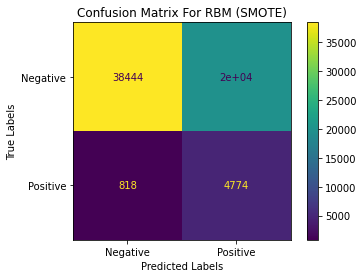

In [78]:
# Generate confusion matrix for RBM
cm_rbm = metrics.confusion_matrix(Y_test, rbm_test_preds_smote)

# Define label names
label_names_rbm = ['Negative', 'Positive']

# Plot the confusion matrix for RBM
disp_rbm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rbm, display_labels=label_names_rbm)
disp_rbm.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For RBM (SMOTE)')
plt.show()

In [80]:
# Reshape the input data for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))  # Flatten the data
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))
# Apply SMOTE to the reshaped training data
smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train_reshaped, Y_train)

# Define the LSTM model (model8)
model8 = Sequential([
    LSTM(64, input_shape=(X_train_reshaped.shape[1], 1)),
    Dense(1, activation='sigmoid')  
])

# Compile and train the model on SMOTE-resampled data
model8.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model8.fit(X_train_smote, Y_train_smote, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
lstm_test_probs_smote = model8.predict(X_test_reshaped)
lstm_test_preds_smote = np.round(lstm_test_probs_smote).flatten()

# Evaluate the model's performance
lstm_test_accuracy_smote = accuracy_score(Y_test, lstm_test_preds_smote)
print(f"LSTM Test Accuracy with SMOTE: {lstm_test_accuracy_smote:.4f}")

Epoch 1/10
14629/14629 [==============================] - 153s 10ms/step - loss: 0.3083 - accuracy: 0.8565
Epoch 2/10
14629/14629 [==============================] - 150s 10ms/step - loss: 0.1988 - accuracy: 0.9128
Epoch 3/10
14629/14629 [==============================] - 150s 10ms/step - loss: 0.1889 - accuracy: 0.9178
Epoch 4/10
14629/14629 [==============================] - 151s 10ms/step - loss: 0.1825 - accuracy: 0.9210
Epoch 5/10
14629/14629 [==============================] - 151s 10ms/step - loss: 0.1804 - accuracy: 0.9221
Epoch 6/10
14629/14629 [==============================] - 152s 10ms/step - loss: 0.1774 - accuracy: 0.9237
Epoch 7/10
14629/14629 [==============================] - 151s 10ms/step - loss: 0.1760 - accuracy: 0.9242
Epoch 8/10
14629/14629 [==============================] - 155s 11ms/step - loss: 0.1741 - accuracy: 0.9256
Epoch 9/10
14629/14629 [==============================] - 151s 10ms/step - loss: 0.1736 - accuracy: 0.9254
Epoch 10/10
1999/1999 [==============

In [82]:
# Make predictions on the test set for LSTM
lstm_test_probs_smote = model8.predict(X_test_reshaped)
lstm_test_preds_smote = np.round(lstm_test_probs_smote).flatten()

# Generate classification report for LSTM
lstm_classification_report = classification_report(Y_test, lstm_test_preds_smote, output_dict=True)
lstm_classification_report_df = pd.DataFrame(lstm_classification_report).transpose()

# Tabulate classification report for LSTM
print("Classification Report for LSTM with SMOTE:")
print(tabulate(lstm_classification_report_df, headers='keys', tablefmt='psql'))

1999/1999 [==============================] - 10s 5ms/step
Classification Report for LSTM with SMOTE:
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| 0            |    0.920592 | 0.988555 |   0.953364 | 58367       |
| 1            |    0.479345 | 0.109979 |   0.178909 |  5592       |
| accuracy     |    0.91174  | 0.91174  |   0.91174  |     0.91174 |
| macro avg    |    0.699968 | 0.549267 |   0.566136 | 63959       |
| weighted avg |    0.882013 | 0.91174  |   0.885652 | 63959       |
+--------------+-------------+----------+------------+-------------+


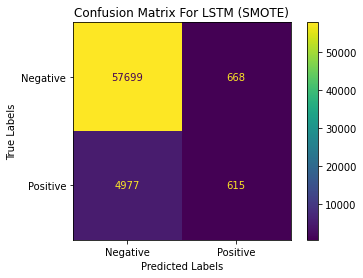

In [83]:
# Generate confusion matrix for LSTM
cm_lstm = metrics.confusion_matrix(Y_test, lstm_test_preds_smote)

# Define label names
label_names_lstm = ['Negative', 'Positive']

# Plot the confusion matrix for LSTM
disp_lstm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=label_names_lstm)
disp_lstm.plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For LSTM (SMOTE)')
plt.show()

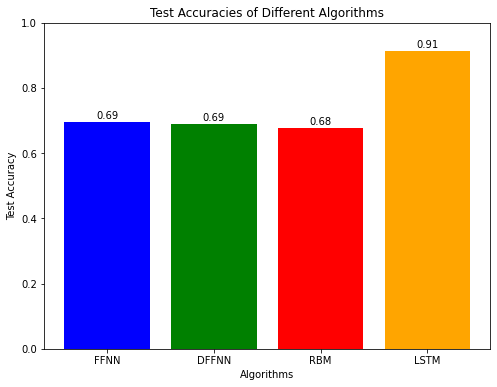

In [84]:
# Assuming test accuracies for FFNN, DFFNN, RBM, and LSTM are stored in variables ffnn_test_accuracy_smote, dffnn_test_accuracy_smote, rbm_test_accuracy_smote, and lstm_test_accuracy_smote respectively

# Update the accuracies dictionary to include FFNN, DFFNN, RBM, and LSTM
accuracies = {
    'FFNN': ffnn_test_accuracy_smote,
    'DFFNN': dffnn_test_accuracy_smote,
    'RBM': rbm_test_accuracy_smote,
    'LSTM': lstm_test_accuracy_smote
}

# Update the colors list to include colors for FFNN, DFFNN, RBM, and LSTM
colors = ['blue', 'green', 'red', 'orange']

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(accuracies.keys(), accuracies.values(), color=colors)
ax.set_xlabel('Algorithms')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracies of Different Algorithms')
ax.set_ylim([0, 1])

# Add the accuracy values on top of the bars
for i, acc in enumerate(accuracies.values()):
    plt.text(i, acc + 0.005, f'{acc:.2f}', ha='center', va='bottom')

# Display the chart
plt.show()

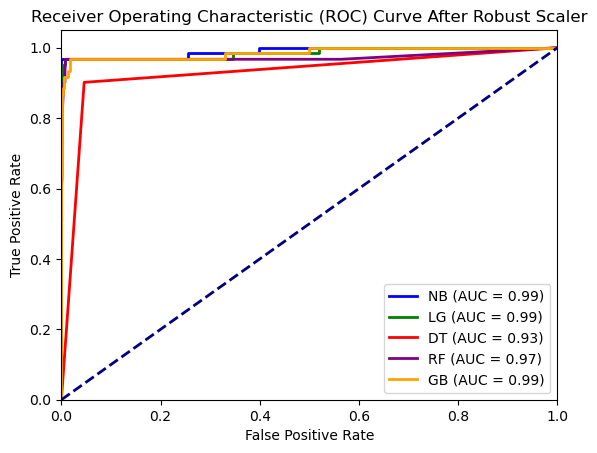

In [74]:
# Make predictions for each classifier
y_probs_nb = nb.predict_proba(X_test_rob)[:, 1]
y_probs_lg = lg.predict_proba(X_test_rob)[:, 1]
y_probs_dt = dt.predict_proba(X_test_rob)[:, 1]
y_probs_rf = rf.predict_proba(X_test_rob)[:, 1]
y_probs_gb = gb.predict_proba(X_test_rob)[:, 1]  # Gradient Boosting predictions
# Compute ROC curve and ROC area for each classifier
fpr_nb, tpr_nb, _ = roc_curve(Y_test, y_probs_nb)
fpr_lg, tpr_lg, _ = roc_curve(Y_test, y_probs_lg)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_probs_dt)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_probs_rf)
fpr_gb, tpr_gb, _ = roc_curve(Y_test, y_probs_gb)  # Gradient Boosting ROC curve
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_lg = auc(fpr_lg, tpr_lg)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_gb = auc(fpr_gb, tpr_gb)  # Gradient Boosting AUC
# Plot the AUC-ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'NB (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_lg, tpr_lg, color='green', lw=2, label=f'LG (AUC = {roc_auc_lg:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'DT (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'RF (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='orange', lw=2, label=f'GB (AUC = {roc_auc_gb:.2f})')  # Gradient Boosting ROC curve on plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve After Robust Scaler')
plt.legend(loc="lower right")
plt.show()

1999/1999 [==============================] - 10s 5ms/step


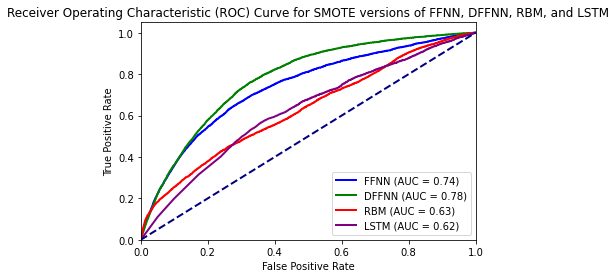

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions for each classifier
ffnn_probs_smote = model5.predict(X_test_rob)
dffnn_probs_smote = model6.predict(X_test_rob)
rbm_probs_smote = model7.predict(X_test_rob)
lstm_probs_smote = model8.predict(X_test_rob)

# Compute ROC curve and ROC area for each classifier
fpr_ffnn, tpr_ffnn, _ = roc_curve(Y_test, ffnn_probs_smote)
fpr_dffnn, tpr_dffnn, _ = roc_curve(Y_test, dffnn_probs_smote)
fpr_rbm, tpr_rbm, _ = roc_curve(Y_test, rbm_probs_smote)
fpr_lstm, tpr_lstm, _ = roc_curve(Y_test, lstm_probs_smote)

roc_auc_ffnn = auc(fpr_ffnn, tpr_ffnn)
roc_auc_dffnn = auc(fpr_dffnn, tpr_dffnn)
roc_auc_rbm = auc(fpr_rbm, tpr_rbm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot the AUC-ROC curve
plt.figure()
plt.plot(fpr_ffnn, tpr_ffnn, color='blue', lw=2, label=f'FFNN (AUC = {roc_auc_ffnn:.2f})')
plt.plot(fpr_dffnn, tpr_dffnn, color='green', lw=2, label=f'DFFNN (AUC = {roc_auc_dffnn:.2f})')
plt.plot(fpr_rbm, tpr_rbm, color='red', lw=2, label=f'RBM (AUC = {roc_auc_rbm:.2f})')
plt.plot(fpr_lstm, tpr_lstm, color='purple', lw=2, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SMOTE versions of FFNN, DFFNN, RBM, and LSTM')
plt.legend(loc="lower right")
plt.show()

<p><b>Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model. Grid Search Cross-Validation (GridSearchCV) is a popular method for hyperparameter tuning. It performs an exhaustive search over a specified parameter grid, evaluating each combination of hyperparameters using cross-validation to determine the best values for the given model and dataset.
    </b></p>

Fitting 5 folds for each of 60 candidates, totalling 300 fits

Classifier: LogisticRegression
Best Parameters: {'classifier__C': 0.615848211066026, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best Score: 0.9163

Classification Report:
+---------+-------------+----------+------------+-----------+
|   Label |   Precision |   Recall |   F1-Score |   Support |
|---------+-------------+----------+------------+-----------|
|       0 |    0.998897 | 0.934502 |   0.965627 |      1939 |
|       1 |    0.317204 | 0.967213 |   0.477733 |        61 |
+---------+-------------+----------+------------+-----------+

Confusion Matrix:
+----------------+---------+
| Metric         |   Value |
|----------------+---------|
| True Positive  |      59 |
| True Negative  |    1812 |
| False Positive |     127 |
| False Negative |       2 |
+----------------+---------+


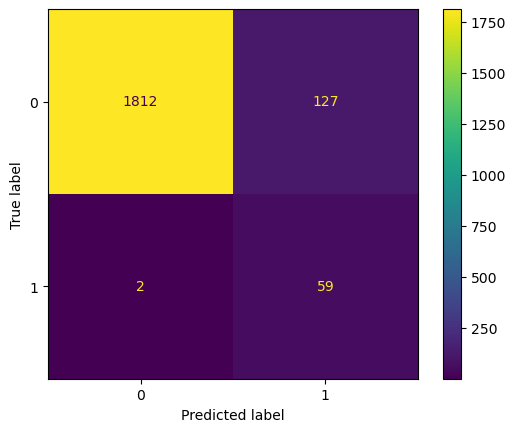

--------------------------------------------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Classifier: RandomForestClassifier
Best Parameters: {'classifier__max_features': 1, 'classifier__n_estimators': 150}
Best Score: 0.9758

Classification Report:
+---------+-------------+----------+------------+-----------+
|   Label |   Precision |   Recall |   F1-Score |   Support |
|---------+-------------+----------+------------+-----------|
|       0 |    0.998946 | 0.977824 |   0.988272 |      1939 |
|       1 |    0.578431 | 0.967213 |   0.723926 |        61 |
+---------+-------------+----------+------------+-----------+

Confusion Matrix:
+----------------+---------+
| Metric         |   Value |
|----------------+---------|
| True Positive  |      59 |
| True Negative  |    1896 |
| False Positive |      43 |
| False Negative |       2 |
+----------------+---------+


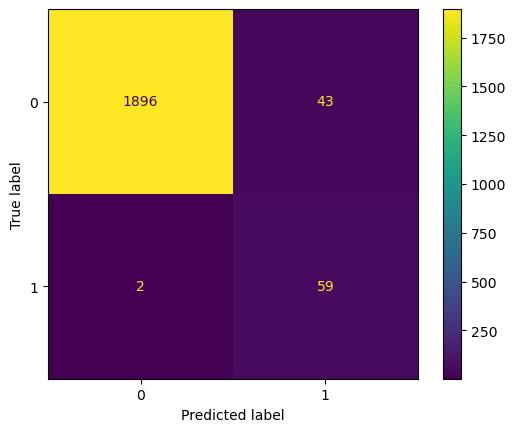

--------------------------------------------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Classifier: GradientBoostingClassifier
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 150}
Best Score: 0.9426

Classification Report:
+---------+-------------+----------+------------+-----------+
|   Label |   Precision |   Recall |   F1-Score |   Support |
|---------+-------------+----------+------------+-----------|
|       0 |    0.998917 | 0.951006 |   0.974373 |      1939 |
|       1 |    0.383117 | 0.967213 |   0.548837 |        61 |
+---------+-------------+----------+------------+-----------+

Confusion Matrix:
+----------------+---------+
| Metric         |   Value |
|----------------+---------|
| True Positive  |      59 |
| True Negative  |    1844 |
| False Positive |      95 |
| False Negative |       2 |
+----------------+---------+


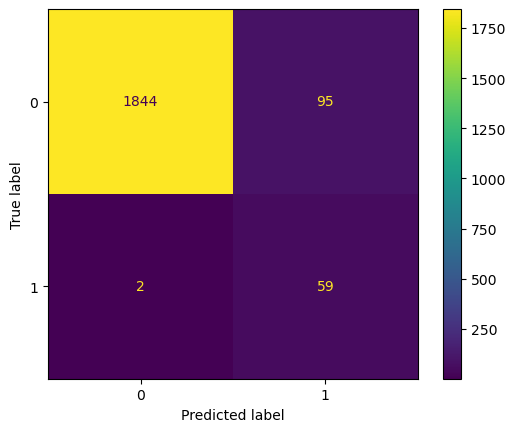

--------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Classifier: GaussianNB
Best Parameters: {}
Best Score: 0.8478

Classification Report:
+---------+-------------+----------+------------+-----------+
|   Label |   Precision |   Recall |   F1-Score |   Support |
|---------+-------------+----------+------------+-----------|
|       0 |     0.99897 | 1        |   0.999485 |      1939 |
|       1 |     1       | 0.967213 |   0.983333 |        61 |
+---------+-------------+----------+------------+-----------+

Confusion Matrix:
+----------------+---------+
| Metric         |   Value |
|----------------+---------|
| True Positive  |      59 |
| True Negative  |    1939 |
| False Positive |       0 |
| False Negative |       2 |
+----------------+---------+


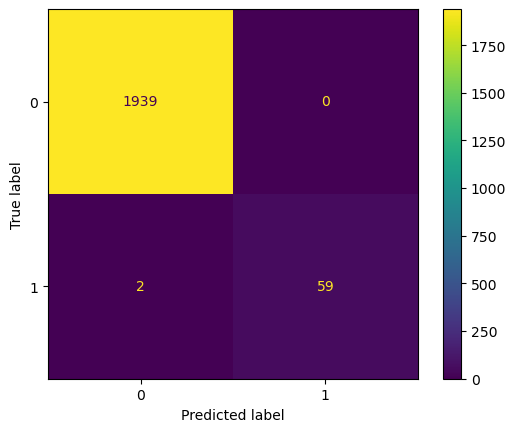

--------------------------------------------------
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Classifier: DecisionTreeClassifier
Best Parameters: {'classifier__criterion': 'entropy'}
Best Score: 0.9523

Classification Report:
+---------+-------------+----------+------------+-----------+
|   Label |   Precision |   Recall |   F1-Score |   Support |
|---------+-------------+----------+------------+-----------|
|       0 |    0.998384 | 0.956163 |   0.976818 |      1939 |
|       1 |    0.405594 | 0.95082  |   0.568627 |        61 |
+---------+-------------+----------+------------+-----------+

Confusion Matrix:
+----------------+---------+
| Metric         |   Value |
|----------------+---------|
| True Positive  |      58 |
| True Negative  |    1854 |
| False Positive |      85 |
| False Negative |       3 |
+----------------+---------+


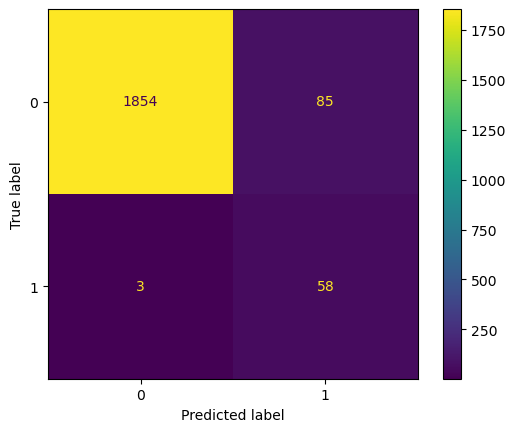

--------------------------------------------------


In [98]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}
# Define parameter grids for each classifier
param_grids = {
    'LogisticRegression': [
        {
            'classifier__solver': ['lbfgs'],
            'classifier__penalty': ['l2'],
            'classifier__C': np.logspace(-4, 4, 20)
        },
        {
            'classifier__solver': ['liblinear'],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__C': np.logspace(-4, 4, 20)
        }
    ],
    'RandomForestClassifier': {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_features': [1, 'sqrt', 'log2']
    },
    'GradientBoostingClassifier': {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__learning_rate': [0.01, 0.05, 0.1]
    },
    'GaussianNB': {},
    'DecisionTreeClassifier': {
        'classifier__criterion': ['gini', 'entropy']
    }
}
# Iterate over classifiers and their parameter grids
for classifier_name, classifier in classifiers.items():
    pipe = Pipeline([('classifier', classifier)])
    grid_search = GridSearchCV(pipe, param_grids[classifier_name], cv=5, verbose=2, n_jobs=-1)
    grid_search.fit(X_train_rob, Y_train_smote)
    
    # Predict on the test set
    y_pred = grid_search.predict(X_test_rob)    
    # Print best parameters and classifier
    print(f"\nClassifier: {classifier_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_:.4f}")    
    # Print classification report
    print("\nClassification Report:")
    report_dict = classification_report(Y_test, y_pred, output_dict=True)
    report_data = []
    for label, metrics in report_dict.items():
        if label not in ["accuracy", "macro avg", "weighted avg"]:
            report_data.append([label] + [metrics["precision"], metrics["recall"], metrics["f1-score"], metrics["support"]])
    headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]
    print(tabulate(report_data, headers=headers, tablefmt='psql'))
    # Print and display confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    print("\nConfusion Matrix:")
    print(tabulate([['True Positive', cm[1, 1]], ['True Negative', cm[0, 0]], ['False Positive', cm[0, 1]], ['False Negative', cm[1, 0]]], headers=['Metric', 'Value'], tablefmt='psql'))    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()    
    print("-"*50)

<b>For Futher Investigation and Studies<b>

In [87]:
"""from sklearn.model_selection import cross_val_score
# Initialize models
lr = LogisticRegression(max_iter=10000)
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
# List of models
models = [lr, nb, dt, rf, gb]
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
# Perform cross-validation
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train_rob, Y_train_smote, cv=5, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")""" 

'from sklearn.model_selection import cross_val_score\n# Initialize models\nlr = LogisticRegression(max_iter=10000)\nnb = GaussianNB()\ndt = DecisionTreeClassifier()\nrf = RandomForestClassifier()\ngb = GradientBoostingClassifier()\n# List of models\nmodels = [lr, nb, dt, rf, gb]\nmodel_names = [\'Logistic Regression\', \'Naive Bayes\', \'Decision Tree\', \'Random Forest\', \'Gradient Boosting\']\n# Perform cross-validation\nfor model, name in zip(models, model_names):\n    scores = cross_val_score(model, X_train_rob, Y_train_smote, cv=5, scoring=\'accuracy\')\n    print(f"{name} - Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")'

In [88]:
""""from sklearn.model_selection import StratifiedKFold
# Initialize models
lr = LogisticRegression(max_iter=10000)
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
# List of models
models = [lr, nb, dt, rf, gb]
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Setup 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5)

for model, name in zip(models, model_names):
    fold = 0
    for train_index, test_index in skf.split(X_train_rob, Y_train_smote):
        fold += 1
        
        # Use `.iloc` for index-based selection
        X_train_fold, X_test_fold = X_train_rob.iloc[train_index], X_train_rob.iloc[test_index]
        Y_train_fold, Y_test_fold = Y_train_smote.iloc[train_index], Y_train_smote.iloc[test_index]

        # Train the model
        model.fit(X_train_fold, Y_train_fold)
        predictions = model.predict(X_test_fold)

        # Display results
        print(f"------ {name} - Fold {fold} ------")
        
        # Classification Report
        report = classification_report(Y_test_fold, predictions, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        print("Classification Report:")
        print(tabulate(report_df, headers='keys', tablefmt='psql'))
        
        # Confusion Matrix
        cm = confusion_matrix(Y_test_fold, predictions)
        print("\nConfusion Matrix:")
        print(tabulate(cm, headers=['Predicted 0', 'Predicted 1'], showindex=['Actual 0', 'Actual 1'], tablefmt='psql'))

        # Display Confusion Matrix using matplotlib
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {name} - Fold {fold}')
        plt.show()
        
        print("\n")"""

'"from sklearn.model_selection import StratifiedKFold\n# Initialize models\nlr = LogisticRegression(max_iter=10000)\nnb = GaussianNB()\ndt = DecisionTreeClassifier()\nrf = RandomForestClassifier()\ngb = GradientBoostingClassifier()\n# List of models\nmodels = [lr, nb, dt, rf, gb]\nmodel_names = [\'Logistic Regression\', \'Naive Bayes\', \'Decision Tree\', \'Random Forest\', \'Gradient Boosting\']\n\n# Setup 5-fold stratified cross-validation\nskf = StratifiedKFold(n_splits=5)\n\nfor model, name in zip(models, model_names):\n    fold = 0\n    for train_index, test_index in skf.split(X_train_rob, Y_train_smote):\n        fold += 1\n        \n        # Use `.iloc` for index-based selection\n        X_train_fold, X_test_fold = X_train_rob.iloc[train_index], X_train_rob.iloc[test_index]\n        Y_train_fold, Y_test_fold = Y_train_smote.iloc[train_index], Y_train_smote.iloc[test_index]\n\n        # Train the model\n        model.fit(X_train_fold, Y_train_fold)\n        predictions = model.p